In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/spine_data.csv',
                 skiprows=1,
                 names=[
                    'pelvic_incidence',
                    'pelvic_tilt',
                    'lumbar_lordosis_angle',
                    'sacral_slope',
                    'pelvic_radius',
                    'degree_spondylolisthesis',
                    'pelvic_slope',
                    'direct_tilt',
                    'thoracic_slope',
                    'cervical_tilt',
                    'sacrum_angle',
                    'scoliosis_slope',
                    'class'
                 ])

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.shape

(310, 13)

In [5]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

<AxesSubplot:>

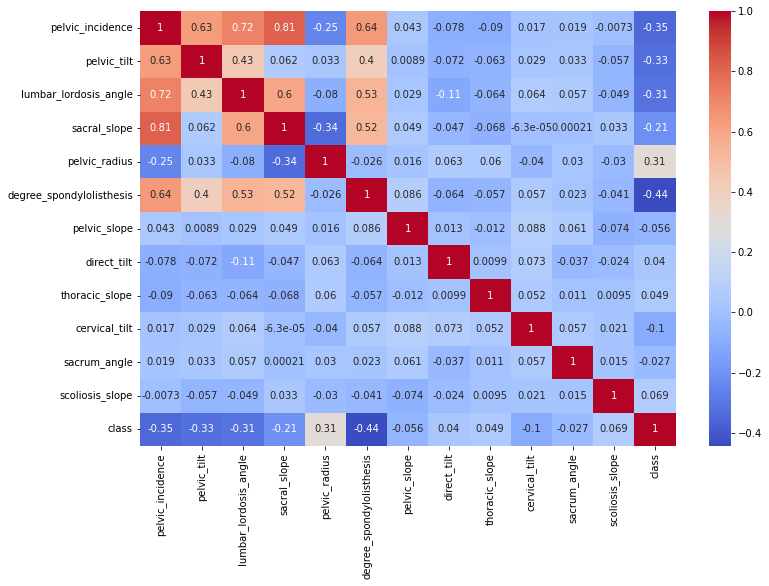

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(10, ),
    max_iter=100,
    activation='relu',
    alpha=0.0001,
    solver='lbfgs',
    verbose=False,
)
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, solver='lbfgs')

In [13]:
y_pred = mlp_clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27 10]
 [ 8 17]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        37
           1       0.63      0.68      0.65        25

    accuracy                           0.71        62
   macro avg       0.70      0.70      0.70        62
weighted avg       0.71      0.71      0.71        62



In [16]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(100, ),
    max_iter=100,
    activation='relu',
    alpha=0.0001,
    solver='lbfgs',
    verbose=False,
)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31  6]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        37
           1       0.76      0.76      0.76        25

    accuracy                           0.81        62
   macro avg       0.80      0.80      0.80        62
weighted avg       0.81      0.81      0.81        62



In [17]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(100, 100,),
    max_iter=100,
    activation='relu',
    alpha=0.0001,
    solver='lbfgs',
    verbose=False,
)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  4]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.82      0.72      0.77        25

    accuracy                           0.82        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.82      0.82      0.82        62



In [21]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(100, 100,),
    max_iter=10000,
    activation='logistic',
    alpha=0.0001,
    solver='adam',
    verbose=False,
)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  4]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.82      0.72      0.77        25

    accuracy                           0.82        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.82      0.82      0.82        62

